#### Comparaison between FeedForward AutoEncoder for Image denoising and Convolutional AutoEncoder 


In [1]:
# Necessary Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv2DTranspose



#### FeedForward AutoEncoder for Image denoising 




In [2]:
# Load MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()


# Reshape data for the dense layer input
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Scale the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Add Gaussian noise to the data
noise = np.random.normal(loc=0.0, scale=0.7, size=train_images.shape)
train_images_noisy = train_images + noise

noise = np.random.normal(loc=0.0, scale=0.7, size=test_images.shape)
test_images_noisy = test_images + noise

# Clip the noisy data by 0 and 1:

train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

11490434/11490434 [==============================] - 1s 0us/step


In [3]:

# Define latent and input dimension
latent_vec_dim = 16
input_dim = 784

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the feedforward (ff) autoencoder architecture
# First build the encoder with dense layers
x = Dense(500, activation='sigmoid')(input_layer)
x = Dense(300, activation='sigmoid')(x)
x = Dense(100, activation='sigmoid')(x)
encoder = Dense(latent_vec_dim, activation='tanh')(x)

# Then build the decoder with dense layers
x = Dense(100, activation='sigmoid')(encoder)
x = Dense(300, activation='sigmoid')(x)
x = Dense(500, activation='sigmoid')(x)
decoder = Dense(input_dim, activation='sigmoid')(x)

# Connect both encoder and decoder
ff_autoencoder = Model(input_layer, decoder, name="ff_autoencoder")

In [4]:
# Compile the model
ff_autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model
history_ff = ff_autoencoder.fit(train_images_noisy, train_images, epochs=50, 
                                batch_size=128, shuffle=True,
                                validation_data=(test_images_noisy, test_images))


Epoch 1/50
469/469 [==============================] - 11s 7ms/step - loss: 0.2683 - val_loss: 0.2633
Epoch 2/50
469/469 [==============================] - 4s 7ms/step - loss: 0.2625 - val_loss: 0.2467
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2410 - val_loss: 0.2354
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2255 - val_loss: 0.2185
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2142 - val_loss: 0.2104
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.2057 - val_loss: 0.2004
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1960 - val_loss: 0.1927
Epoch 8/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1898 - val_loss: 0.1878
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1836 - val_loss: 0.1811
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1775 - val_loss: 0.177

In [5]:
# Denoise new images (prediction)
ff_autoencoder_denoised_images = ff_autoencoder.predict(test_images_noisy)

313/313 [==============================] - 1s 2ms/step


In [6]:
# Clear the history of the previous model
tf.keras.backend.clear_session()

#### Convolutional AutoEncoder 


In [7]:
# Load the MNIST dataset again
(train_images, _), (test_images, _) = mnist.load_data()


# Reshape data for the convolutional layer input
train_images = np.reshape(train_images, (len(train_images), 28, 28, 1))
test_images = np.reshape(test_images, (len(test_images), 28, 28, 1))

# Scale the data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Add Gaussian noise to the data
noise = np.random.normal(loc=0.0, scale=0.7, size=train_images.shape)
train_images_noisy = train_images + noise

noise = np.random.normal(loc=0.0, scale=0.7, size=test_images.shape)
test_images_noisy = test_images + noise

# Clip the noisy data by 0 and 1 as before
train_images_noisy = np.clip(train_images_noisy, 0., 1.)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)


In [8]:
# Define AE
# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Define the convolutional (conv) autoencoder architecture
# First build the encoder with convolutional layers
x = Conv2D(64, (3, 3), activation="relu", padding="same")(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoder = MaxPooling2D((2, 2), padding='same')(x)

# Then build the decoder with transposed convolutional layers
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(encoder)
x = Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
decoder = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Connect both encoder and decoder
conv_autoencoder = Model(input_layer, decoder, name="conv_autoencoder")

In [9]:
# Compile the model
conv_autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model
history_conv = conv_autoencoder.fit(train_images_noisy, train_images,
                                    epochs=50, batch_size=128, shuffle=True, 
                                    validation_data=(test_images_noisy, test_images))

# Denoise new images (prediction)
conv_autoencoder_denoised_images = conv_autoencoder.predict(test_images_noisy)

Epoch 1/50
469/469 [==============================] - 14s 15ms/step - loss: 0.1915 - val_loss: 0.1450
Epoch 2/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1412 - val_loss: 0.1362
Epoch 3/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1353 - val_loss: 0.1319
Epoch 4/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1315 - val_loss: 0.1291
Epoch 5/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1291 - val_loss: 0.1273
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1275 - val_loss: 0.1263
Epoch 7/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1264 - val_loss: 0.1251
Epoch 8/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1254 - val_loss: 0.1243
Epoch 9/50
469/469 [==============================] - 6s 14ms/step - loss: 0.1247 - val_loss: 0.1235
Epoch 10/50
469/469 [==============================] - 6s 13ms/step - loss: 0.1240 - val_l

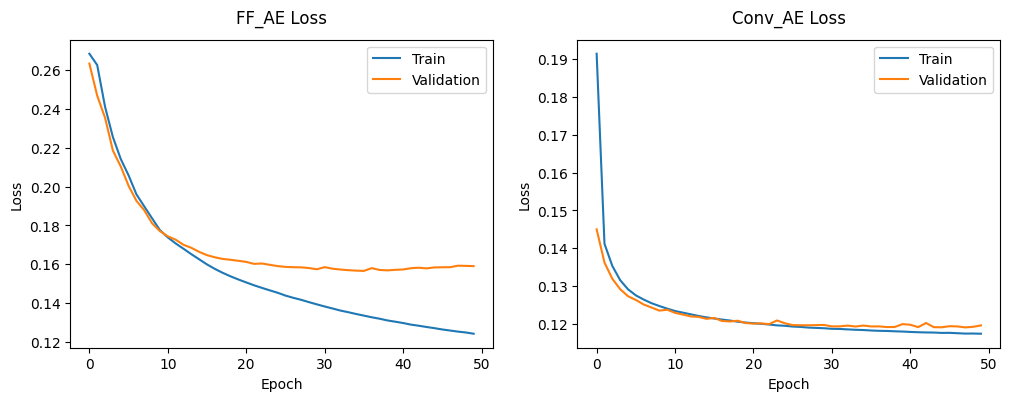

In [10]:
# Plot training and validation loss scores
# against the number of epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history_ff.history['loss'], label='Train')
ax1.plot(history_ff.history['val_loss'], label='Validation')
ax1.set_title('FF_AE Loss', pad=12)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

ax2.plot(history_conv.history['loss'], label='Train')
ax2.plot(history_conv.history['val_loss'], label='Validation')
ax2.set_title('Conv_AE Loss', pad=12)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')

plt.savefig("Learning_Curves.png")

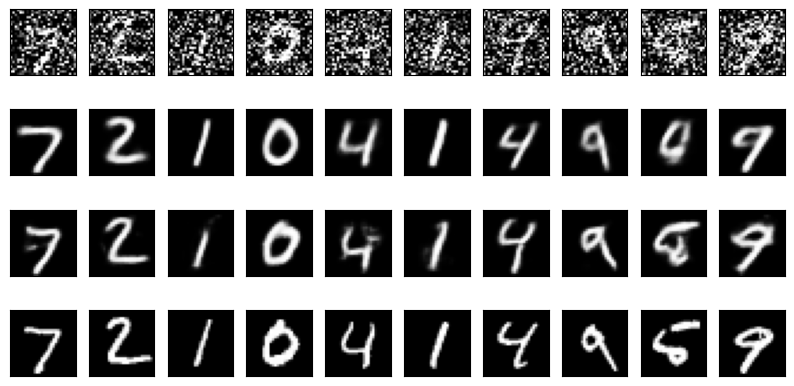

In [11]:
# Visualize image outputs
n = 10
plt.figure(figsize=(10, 5))

for i in range(n):
    # Display noisy images
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images by feedforward autoencoder
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(ff_autoencoder_denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images by convolutional autoencoder
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(conv_autoencoder_denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images for comparison purposes
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.savefig("Comparisons.png")